<a href="https://colab.research.google.com/github/jaq0812/Tareas/blob/main/Tarea_integradora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------
# Parte 1: Preprocesamiento y Diagnóstico (Happiness, Titanic)

1. Lectura y documentación inicial:

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist


# Cargar los datasets
df_titanic = pd.read_csv('titanic.csv')
df_happiness = pd.read_csv('happiness.csv')
df_countries_info = pd.read_csv('countries.csv')

# Unir los datasets de Happiness y países
df_happiness_merged = pd.merge(df_happiness, df_countries_info, left_on='country', right_on='country_name', how='left')

# Información inicial del Titanic
print("--- Dataset del Titanic ---")
print(f"Número de observaciones y variables: {df_titanic.shape}")
print("\nVariables y sus tipos:")
df_titanic.info()

# Información inicial de Happiness
print("\n--- Dataset de Happiness ---")
print(f"Número de observaciones y variables: {df_happiness_merged.shape}")
print("\nVariables y sus tipos:")
df_happiness_merged.info()

# Agregar etiquetas a las variables
df_titanic['survived_label'] = df_titanic['survived'].map({0: 'No', 1: 'Sí'})
df_titanic['pclass_label']=df_titanic['embarked'].map({'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'})


# Identificar variables categóricas y numéricas
categorical_vars_titanic = df_titanic.select_dtypes(include=['object', 'category']).columns
numerical_vars_titanic = df_titanic.select_dtypes(include=['int64', 'float64']).columns
print("\n--- Conteo de variables en Titanic ---")
print(f"Variables categóricas: {len(categorical_vars_titanic)}")
print(f"Variables numéricas: {len(numerical_vars_titanic)}")
categorical_vars_happ = df_happiness_merged.select_dtypes(include=['object', 'category']).columns
numerical_vars_happ = df_happiness_merged.select_dtypes(include=['int64', 'float64']).columns
print("\n--- Conteo de variables en Countries ---")
print(f"Variables categóricas: {len(categorical_vars_happ)}")
print(f"Variables numéricas: {len(numerical_vars_happ)}")

# ¿Hay alguna variable que pueda ser un ID?
# En el Titanic, 'name' o 'cabin' pueden ser IDs
# En Happiness, 'Country name'
print("\nPosibles variables ID:")
print(f"Titanic: {['name', 'cabin']}")
print(f"Happiness: {['Country name']}")

--- Dataset del Titanic ---
Número de observaciones y variables: (1309, 10)

Variables y sus tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB

--- Dataset de Happiness ---
Número de observaciones y variables: (135, 12)

Variables y sus tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  


---

 2. Diagnóstico exploratorio:

In [21]:
# 2. Diagnóstico exploratorio
print("\n--- Temas para análisis descriptivo ---")
print("1. Distribución de la supervivencia en el Titanic.")
print("2. Relación entre la clase de viaje y la supervivencia.")
print("3. Impacto de la edad y el sexo en la supervivencia.")
print("4. Distribución del puntaje de felicidad por región.")
print("5. Correlación entre el puntaje de felicidad y el PIB per cápita.")
print("6. Relación entre la esperanza de vida y la felicidad.")

# Describe 5 variables numéricas con media, min y max (usando nombres originales)
print("\n--- Descripción de 5 variables numéricas ---")
print(df_titanic[['age', 'fare']].describe().loc[['mean', 'min', 'max']])
print(df_happiness_merged[['happiness_score', 'social_support', 'generosity']].describe().loc[['mean', 'min', 'max']])

# Renombra al menos 5 variables
df_titanic.rename(columns={'pclass_label': 'clase_viaje', 'survived': 'sobrevivio', 'sex': 'genero'}, inplace=True)
df_happiness_merged.rename(columns={'happiness_score': 'puntaje_felicidad', 'social_support': 'soporte_social',
                                    'freedom_of_choices': 'libertad_de_eleccion', 'generosity': 'generosidad',
                                    'perception_of_corruption': 'percepcion_corrupcion'}, inplace=True)
print("\nVariables renombradas en Titanic:", df_titanic.columns)
print("\nVariables renombradas en Happiness:", df_happiness_merged.columns)

# Describe 5 variables categóricas con sus frecuencias
print("\n--- Frecuencias de 5 variables categóricas ---")
print("\nFrecuencias de 'clase_viaje' en Titanic:")
print(df_titanic['clase_viaje'].value_counts(dropna=False))
print("\nFrecuencias de 'genero' en Titanic:")
print(df_titanic['genero'].value_counts(dropna=False))
print("\nFrecuencias de 'world_region' en Happiness:")
print(df_happiness_merged['world_region'].value_counts(dropna=False))
print("\nFrecuencias de 'country_name' en Happiness:")
print(df_happiness_merged['country_name'].value_counts(dropna=False))
print("\nFrecuencias de 'literacy' en Happiness:")
print(df_happiness_merged['literacy'].value_counts(dropna=False))

# Cambia el tipo de otras 5 variables
df_titanic['clase_viaje'] = df_titanic['clase_viaje'].astype('category')
df_titanic['sobrevivio'] = df_titanic['sobrevivio'].astype('category')
df_titanic['genero'] = df_titanic['genero'].astype('category')

df_happiness_merged['world_region'] = df_happiness_merged['world_region'].astype('category')
df_happiness_merged['literacy'] = df_happiness_merged['literacy'].astype('category')

print("\n--- Tipos de datos actualizados ---")
df_titanic.info()
df_happiness_merged.info()

# Construye un nuevo archivo dataset con las variables clave
variables_clave_titanic = ['sobrevivio', 'clase_viaje', 'genero', 'age', 'fare', 'embarked']
df_titanic_clean = df_titanic[variables_clave_titanic].copy()

variables_clave_happiness = ['country', 'puntaje_felicidad', 'soporte_social',
                             'libertad_de_eleccion', 'percepcion_corrupcion',
                             'healthy_life_expectancy', 'world_region', 'country_name']
df_happiness_clean = df_happiness_merged[variables_clave_happiness].copy()

print("\nNuevo dataset del Titanic creado con variables clave.")
print("\nNuevo dataset de Happiness creado con variables clave.")


--- Temas para análisis descriptivo ---
1. Distribución de la supervivencia en el Titanic.
2. Relación entre la clase de viaje y la supervivencia.
3. Impacto de la edad y el sexo en la supervivencia.
4. Distribución del puntaje de felicidad por región.
5. Correlación entre el puntaje de felicidad y el PIB per cápita.
6. Relación entre la esperanza de vida y la felicidad.

--- Descripción de 5 variables numéricas ---
            age        fare
mean  29.881135   33.295479
min    0.166700    0.000000
max   80.000000  512.329200
      happiness_score  social_support  generosity
mean         5.525062        0.815165   -0.022749
min          2.566900        0.468671   -0.300907
max          7.808700        0.974670    0.519587

Variables renombradas en Titanic: Index(['sobrevivio', 'name', 'genero', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'survived_label', 'clase_viaje'],
      dtype='object')

Variables renombradas en Happiness: Index(['country', 'puntaje_fe

--------------------
# Parte 2: Datos Faltantes y Atípicos (Happiness, Titanic)

--- Visualización de NA en el dataset del Titanic ---


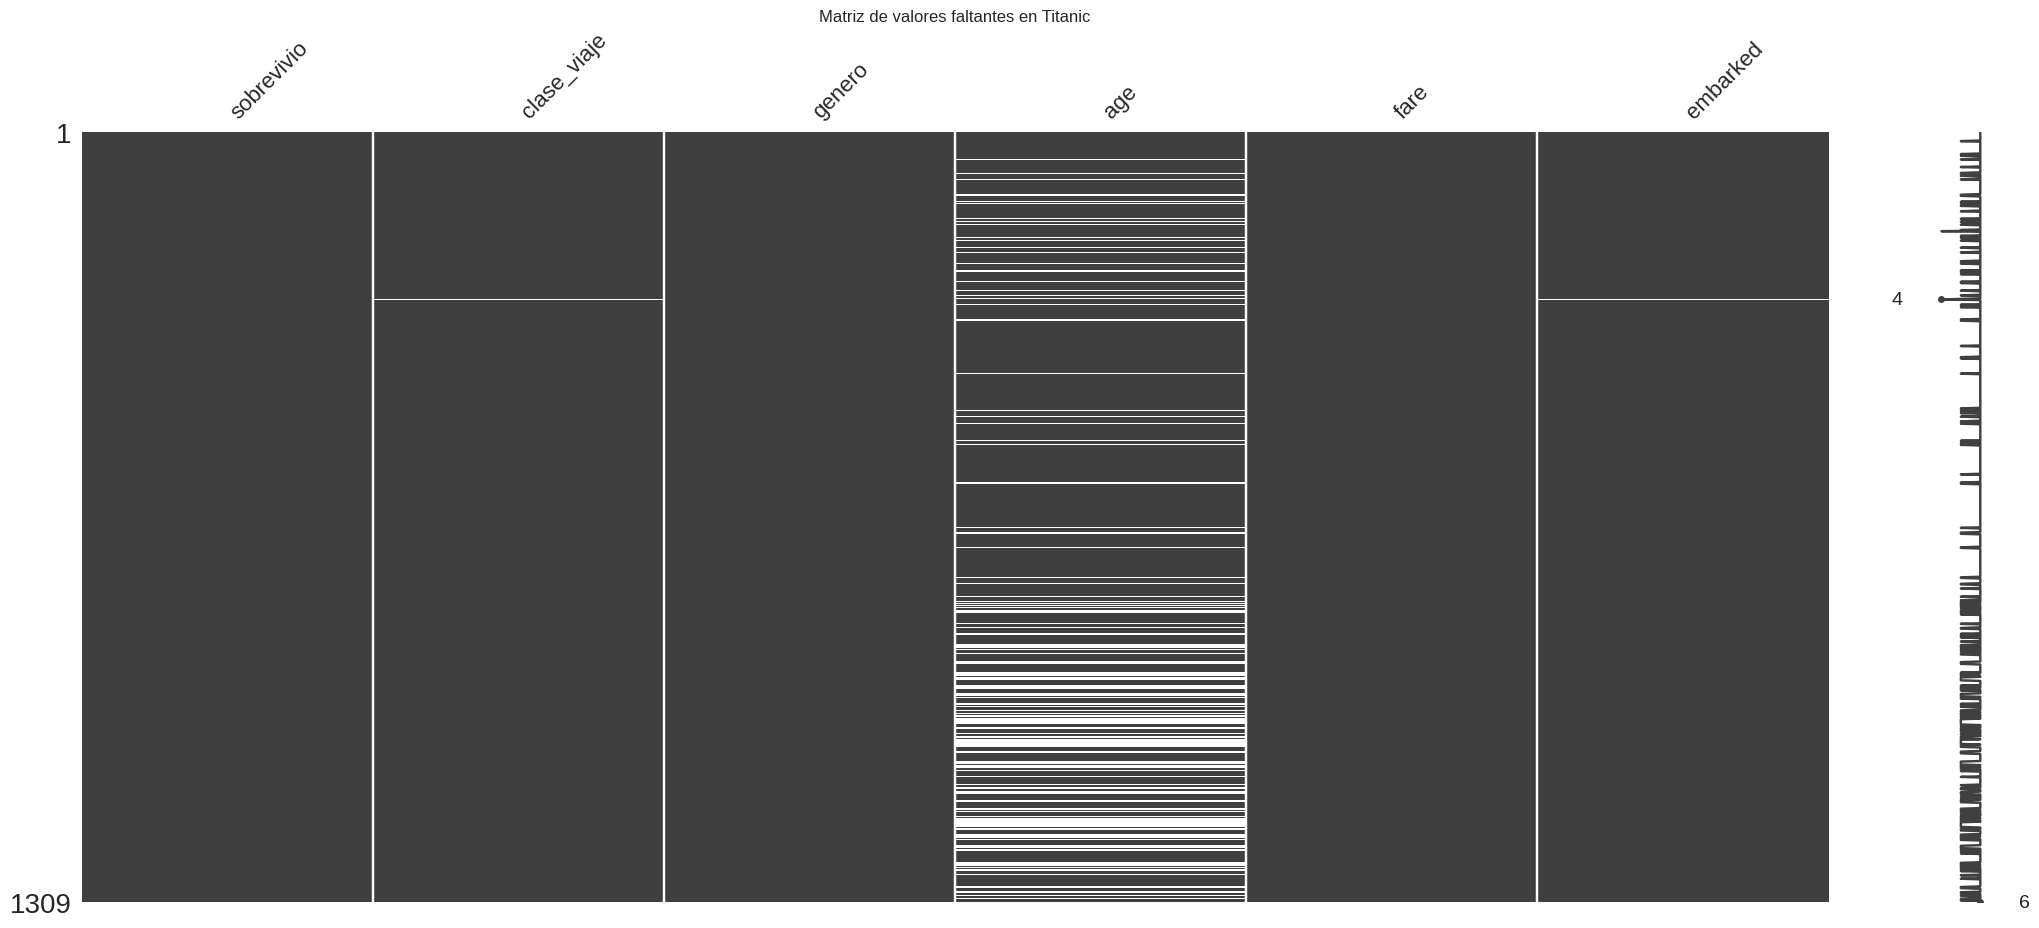


--- Visualización de NA en el dataset de Happiness ---


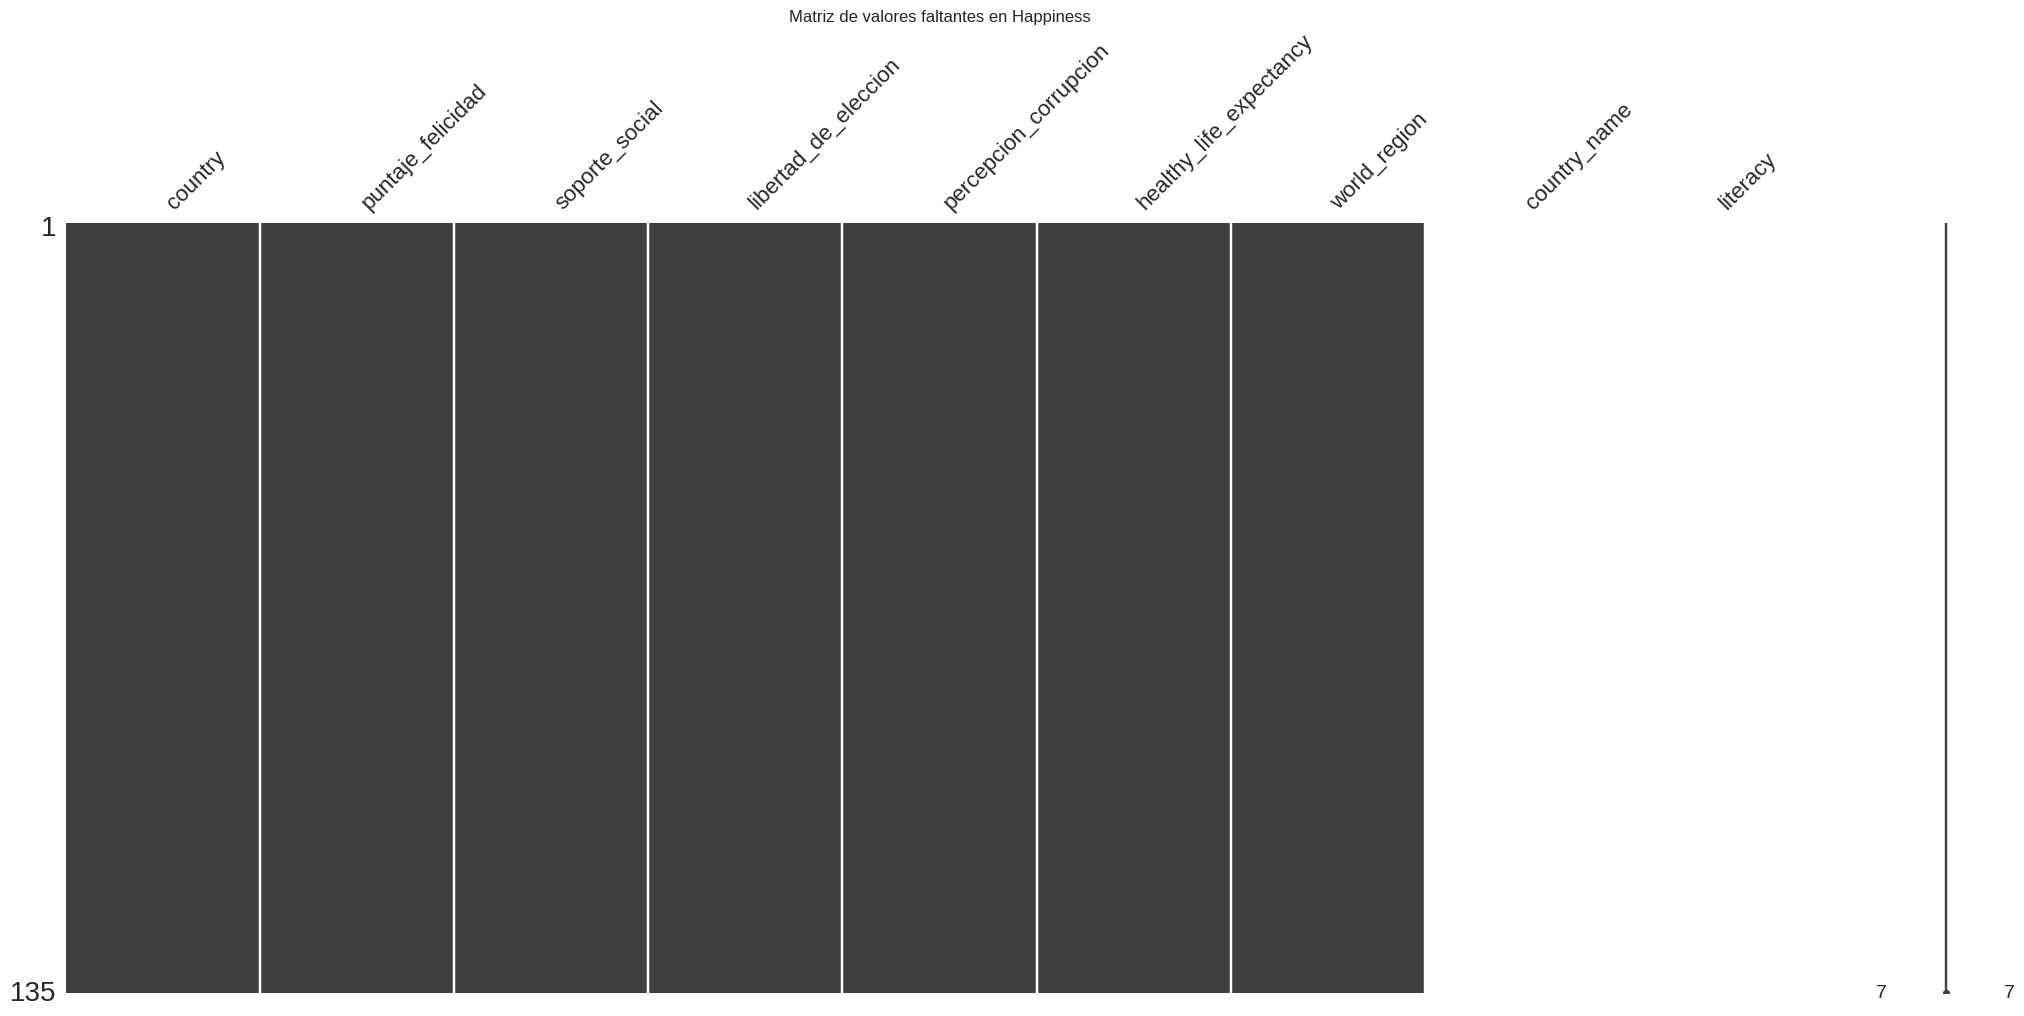

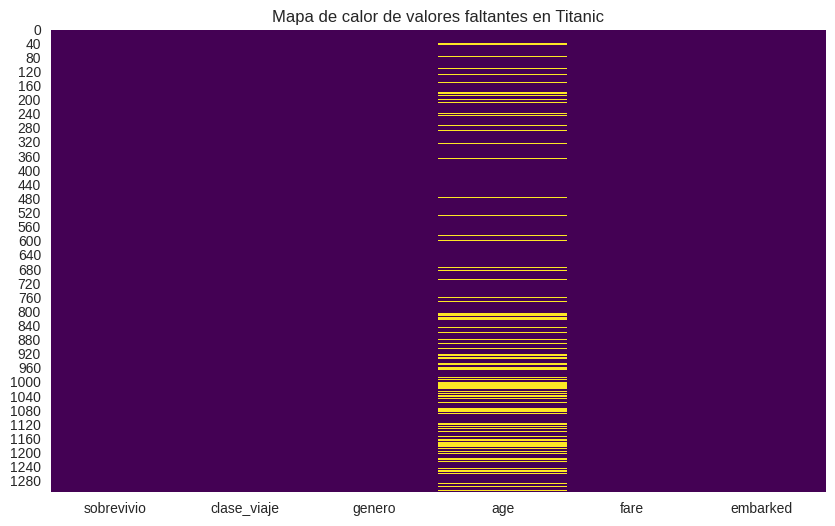


--- Conteo de NA por variable en Titanic ---
sobrevivio       0
clase_viaje      2
genero           0
age            263
fare             1
embarked         2
dtype: int64

--- Conteo de NA por variable en Happiness ---
country                      0
puntaje_felicidad            0
soporte_social               0
libertad_de_eleccion         0
percepcion_corrupcion        0
healthy_life_expectancy      0
world_region                 0
country_name               135
literacy                   135
dtype: int64

--- Hipótesis sobre los datos faltantes ---
En el Titanic, 'age' podría faltar de forma aleatoria (MCAR), mientras que 'cabin' probablemente falte en función de la clase de viaje (MNAR).
En Happiness, los NA en 'literacy' probablemente son MNAR, ya que faltan para paises con ciertos perfiles.

--- Conteo de NA después de la imputación ---
sobrevivio     0
clase_viaje    2
genero         0
age            0
fare           1
embarked       0
dtype: int64
country                      0

/tmp/ipython-input-150378739.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_clean['age'].fillna(mediana_edad, inplace=True)
/tmp/ipython-input-150378739.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [22]:
variables_clave_titanic = ['sobrevivio', 'clase_viaje', 'genero', 'age', 'fare', 'embarked']
df_titanic_clean = df_titanic[variables_clave_titanic].copy()

variables_clave_happiness = ['country', 'puntaje_felicidad', 'soporte_social',
                             'libertad_de_eleccion', 'percepcion_corrupcion',
                             'healthy_life_expectancy', 'world_region', 'country_name', 'literacy']
df_happiness_clean = df_happiness_merged[variables_clave_happiness].copy()


# 3. Análisis de NA
# Visualización de valores faltantes para el dataset del Titanic
print("--- Visualización de NA en el dataset del Titanic ---")
msno.matrix(df_titanic_clean)
plt.title("Matriz de valores faltantes en Titanic")
plt.show()

# Visualización de valores faltantes para el dataset de Happiness
print("\n--- Visualización de NA en el dataset de Happiness ---")
msno.matrix(df_happiness_clean)
plt.title("Matriz de valores faltantes en Happiness")
plt.show()

# mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_titanic_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes en Titanic')
plt.show()


# Identificar el numero de NA por variable
print("\n--- Conteo de NA por variable en Titanic ---")
print(df_titanic_clean.isnull().sum())

print("\n--- Conteo de NA por variable en Happiness ---")
print(df_happiness_clean.isnull().sum())

print("\n--- Hipótesis sobre los datos faltantes ---")
print("En el Titanic, 'age' podría faltar de forma aleatoria (MCAR), mientras que 'cabin' probablemente falte en función de la clase de viaje (MNAR).")
print("En Happiness, los NA en 'literacy' probablemente son MNAR, ya que faltan para paises con ciertos perfiles.")

# Imputar al menos dos variables con tecnicas diferentes
# 1. Titanic: Imputamos la edad (variable numérica) con la mediana
mediana_edad = df_titanic_clean['age'].median()
df_titanic_clean['age'].fillna(mediana_edad, inplace=True)

# 2. Titanic: Imputamos la columna 'embarked' con la moda
moda_embarked = df_titanic_clean['embarked'].mode()[0]
df_titanic_clean['embarked'].fillna(moda_embarked, inplace=True)

# 3. Happiness: Imputamos la columna 'literacy' (variable numérica)
df_happiness_clean['literacy'] = df_happiness_clean['literacy'].str.replace(',', '.').astype(float)
media_literacy = df_happiness_clean['literacy'].mean()
df_happiness_clean['literacy'].fillna(media_literacy, inplace=True)


print("\n--- Conteo de NA después de la imputación ---")
print(df_titanic_clean.isnull().sum())
print(df_happiness_clean.isnull().sum())



print("\nSe han imputado valores NA y se han detectado")

--------------
4. Valores atipicos


--- Detección de valores atipicos en Titanic ---


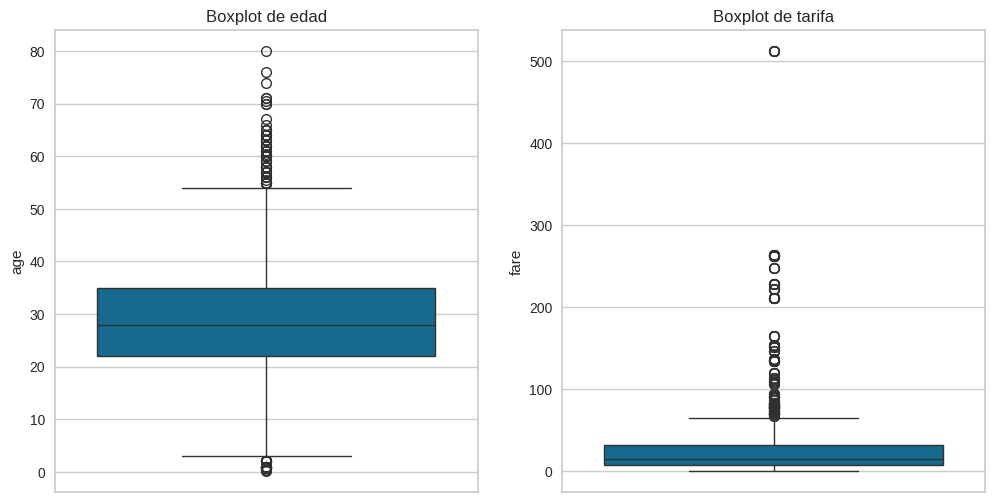


--- Detección de valores atipicos en Happiness ---


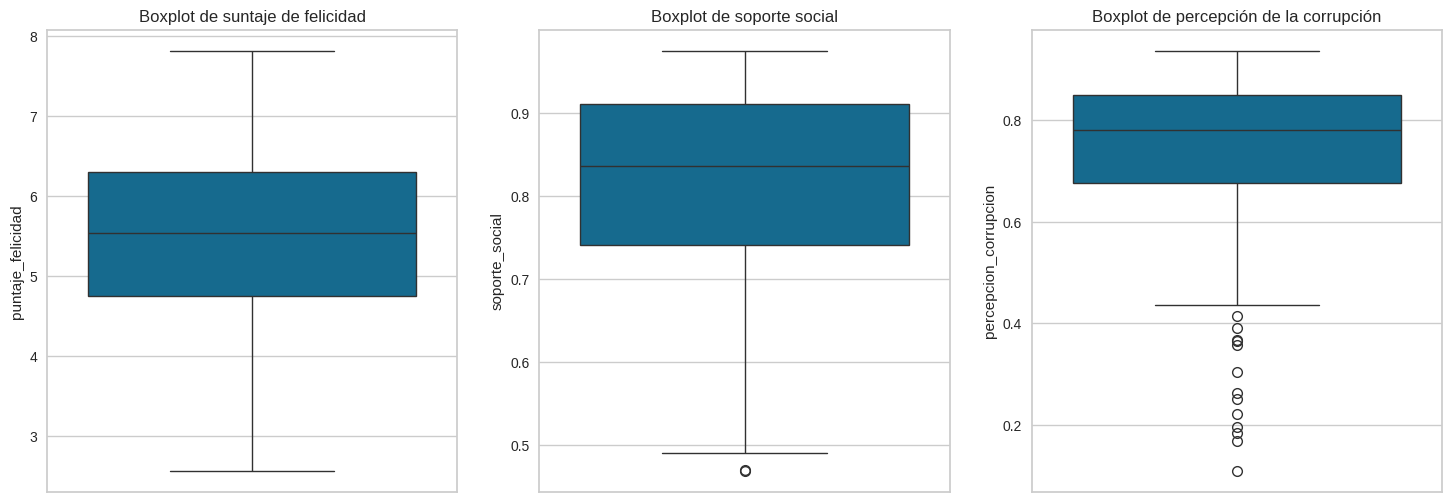


Numero de filas con outliers en 'fare': 171
Ejemplo de outliers en 'fare':
  sobrevivio  clase_viaje  genero      age      fare embarked
0          1  Southampton  female  29.0000  211.3375        S
1          1  Southampton    male   0.9167  151.5500        S
2          0  Southampton  female   2.0000  151.5500        S
3          0  Southampton    male  30.0000  151.5500        S
4          0  Southampton  female  25.0000  151.5500        S


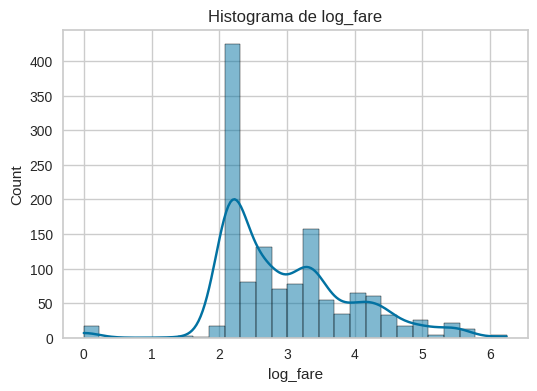


Se han detectado y analizado outliers en los datasets.


In [23]:
# Detección de outliers con boxplots
print("\n--- Detección de valores atipicos en Titanic ---")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_titanic_clean['age'])
plt.title('Boxplot de edad')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_titanic_clean['fare'])
plt.title('Boxplot de tarifa')
plt.show()

print("\n--- Detección de valores atipicos en Happiness ---")
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_happiness_clean['puntaje_felicidad'])
plt.title('Boxplot de suntaje de felicidad')
plt.subplot(1, 3, 2)
sns.boxplot(y=df_happiness_clean['soporte_social'])
plt.title('Boxplot de soporte social')
plt.subplot(1, 3, 3)
sns.boxplot(y=df_happiness_clean['percepcion_corrupcion'])
plt.title('Boxplot de percepción de la corrupción')
plt.show()

# Identificar y tomar decisiones sobre los outliers
Q1 = df_titanic_clean['fare'].quantile(0.25)
Q3 = df_titanic_clean['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar las filas con outliers
outliers_fare = df_titanic_clean[(df_titanic_clean['fare'] < lower_bound) | (df_titanic_clean['fare'] > upper_bound)]
print(f"\nNumero de filas con outliers en 'fare': {len(outliers_fare)}")
print("Ejemplo de outliers en 'fare':")
print(outliers_fare.head())

# Decisiones sobre los outliers:
# 1. Eliminar: Puede ser util si los outliers son errores de entrada o si son muy extremos.
#    df_titanic_clean_no_outliers = df_titanic_clean[~((df_titanic_clean['fare'] < lower_bound) | (df_titanic_clean['fare'] > upper_bound))]
# 2. Imputar/Transformar: usar el logaritmo de la tarifa para reducir su asimetria.
df_titanic_clean['log_fare'] = np.log(df_titanic_clean['fare'] + 1) # Se suma 1 para manejar valores de 0
plt.figure(figsize=(6, 4))
sns.histplot(df_titanic_clean['log_fare'], kde=True)
plt.title('Histograma de log_fare')
plt.show()

print("\nSe han detectado y analizado outliers en los datasets.")

--------------------
# Parte 3: Duplicados (Happiness, Titanic)

In [24]:
# --- Duplicados en el dataset del Titanic ---
print("--- Análisis de duplicados en el dataset del Titanic ---")

# Visualizar posibles duplicaciones
num_duplicados_titanic = df_titanic_clean.duplicated().sum()
print(f"Número de filas duplicadas exactas en Titanic: {num_duplicados_titanic}")

if num_duplicados_titanic > 0:
    print("\nEjemplo de filas duplicadas en Titanic:")
    print(df_titanic_clean[df_titanic_clean.duplicated(keep=False)].sort_values(by=list(df_titanic_clean.columns)).head())

# Detectar y eliminar duplicados
df_titanic_clean_no_duplicates = df_titanic_clean.drop_duplicates().copy()
print(f"\nNúmero de filas después de eliminar duplicados exactos en Titanic: {df_titanic_clean_no_duplicates.shape[0]}")


# Buscar duplicados parciales
duplicados_parciales_titanic = df_titanic_clean_no_duplicates.duplicated(subset=['age', 'genero', 'clase_viaje'], keep=False)
num_parciales_titanic = duplicados_parciales_titanic.sum()
print(f"\nNúmero de duplicados parciales (age, genero, clase_viaje) en Titanic: {num_parciales_titanic}")
if num_parciales_titanic > 0:
    print("Ejemplo de duplicados parciales en Titanic:")
    print(df_titanic_clean_no_duplicates[duplicados_parciales_titanic].sort_values(by=['age', 'genero', 'clase_viaje']).head())


# --- Duplicados en el dataset de Happiness ---
print("\n--- Analisis de duplicados en el dataset de Happiness ---")

# Visualizar posibles duplicaciones
num_duplicados_happiness = df_happiness_clean.duplicated().sum()
print(f"Numero de filas duplicadas exactas en Happiness: {num_duplicados_happiness}")

if num_duplicados_happiness > 0:
    print("\nEjemplo de filas duplicadas en Happiness:")
    print(df_happiness_clean[df_happiness_clean.duplicated(keep=False)].sort_values(by=list(df_happiness_clean.columns)).head())

# Detectar y eliminar duplicados
df_happiness_clean_no_duplicates = df_happiness_clean.drop_duplicates().copy()
print(f"\nNumero de filas despues de eliminar duplicados exactos en Happiness: {df_happiness_clean_no_duplicates.shape[0]}")

# duplicados parciales
duplicados_country_happiness = df_happiness_clean_no_duplicates.duplicated(subset=['country'], keep=False)
num_parciales_happiness = duplicados_country_happiness.sum()
print(f"\nNumero de duplicados parciales (country) en Happiness: {num_parciales_happiness}")
if num_parciales_happiness > 0:
    print("Ejemplo de duplicados parciales en Happiness:")
    print(df_happiness_clean_no_duplicates[duplicados_country_happiness].sort_values(by='country').head())

--- Análisis de duplicados en el dataset del Titanic ---
Número de filas duplicadas exactas en Titanic: 227

Ejemplo de filas duplicadas en Titanic:
     sobrevivio clase_viaje  genero   age     fare embarked  log_fare
928           0   Cherbourg  female  28.0  14.4542        C  2.737881
1305          0   Cherbourg  female  28.0  14.4542        C  2.737881
1241          0   Cherbourg    male  28.0   6.4375        C  2.006535
1242          0   Cherbourg    male  28.0   6.4375        C  2.006535
680           0   Cherbourg    male  28.0   7.2250        C  2.107178

Número de filas después de eliminar duplicados exactos en Titanic: 1082

Número de duplicados parciales (age, genero, clase_viaje) en Titanic: 958
Ejemplo de duplicados parciales en Titanic:
     sobrevivio  clase_viaje  genero     age     fare embarked  log_fare
359           1  Southampton    male  0.8333  29.0000        S  3.401197
548           1  Southampton    male  0.8333  18.7500        S  2.983153
611           1  Sou

-------------------------------
# Parte 4: Análisis Descriptivo y Exploratorio (Happiness, Titanic)

--- Análisis Exploratorio Titanic ---


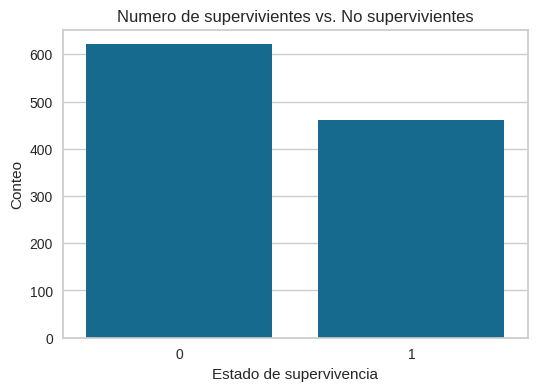

Insight 1: La mayoria de los pasajeros del Titanic no sobrevivieron.


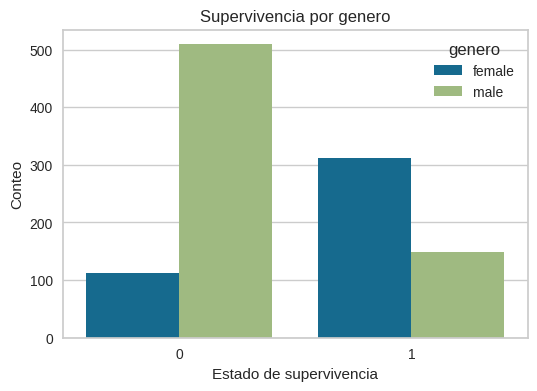

Insight 2: La tasa de supervivencia de las mujeres fue significativamente mas alta que la de los hombres.


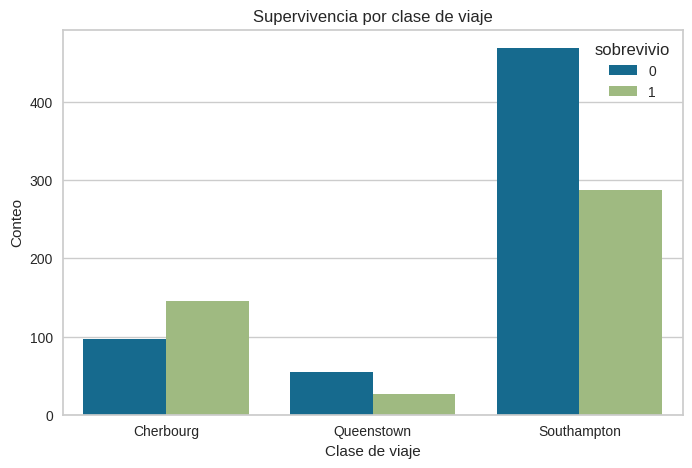

Insight 3: Los pasajeros de primera clase tuvieron una mayor probabilidad de sobrevivir que los de segunda y tercera clase.


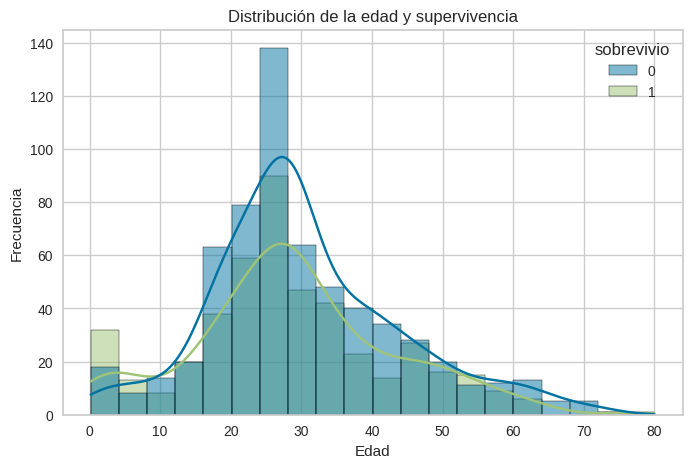

Insight 4: Los niños (menores de 10 años) mostraron una alta tasa de supervivencia, mientras que las personas mayores tuvieron una tasa mas baja.

--- Análisis Exploratorio Happiness ---


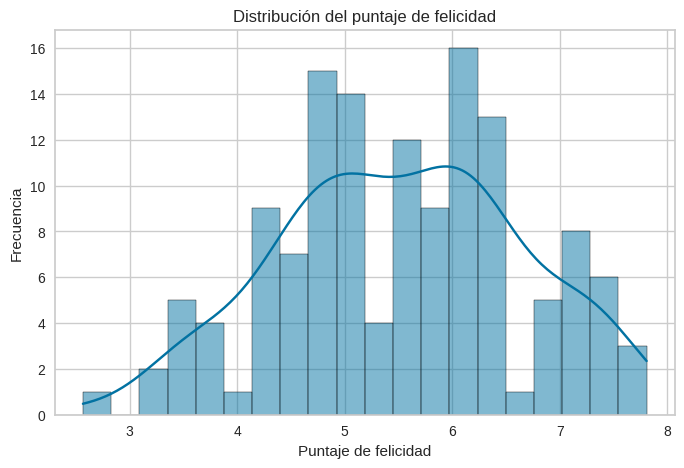

Insight 5: El puntaje de felicidad sigue una distribución cercana a la normal, con la mayoria de los paises en el rango medio.


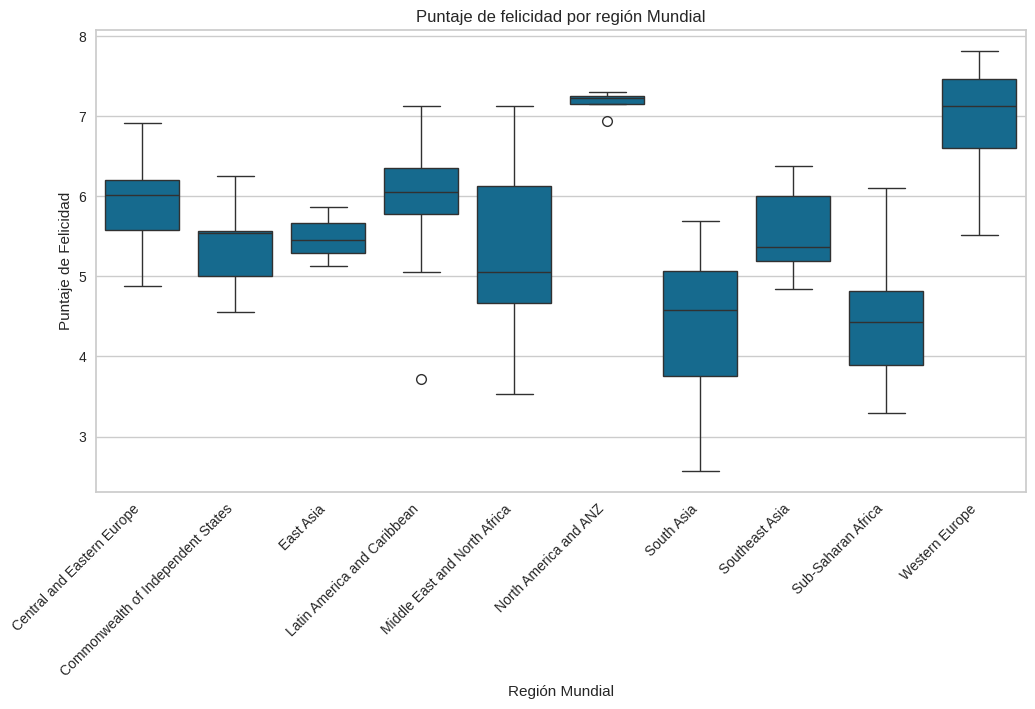

Insight 6: Los paises de norteamerica y australasia tienen los puntajes de felicidad mas altos, mientras que los de africa subsahariana tienen los mas bajos.


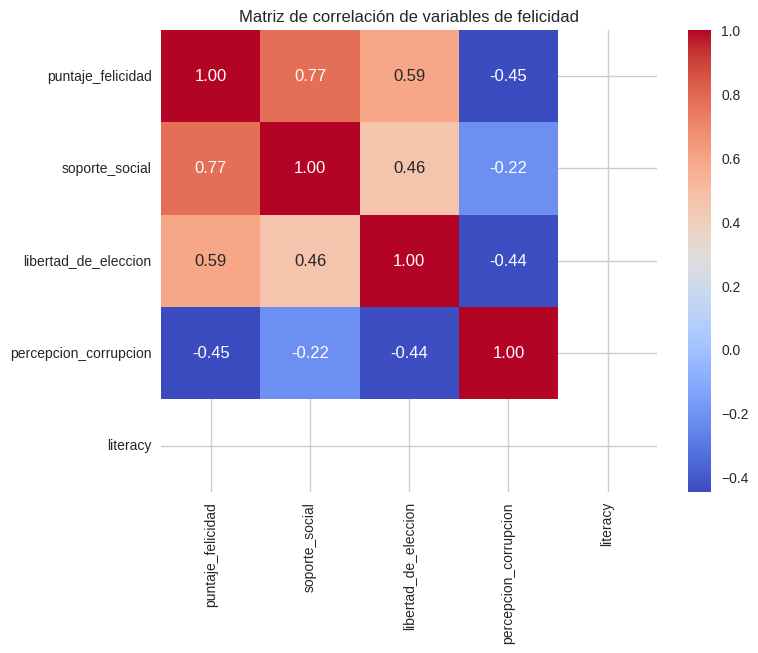

Insight 7: Existe una fuerte correlación positiva entre el puntaje de felicidad y el soporte social
Insight 8: La percepción de corrupción muestra una correlación negativa, aunque debil, con la felicidad


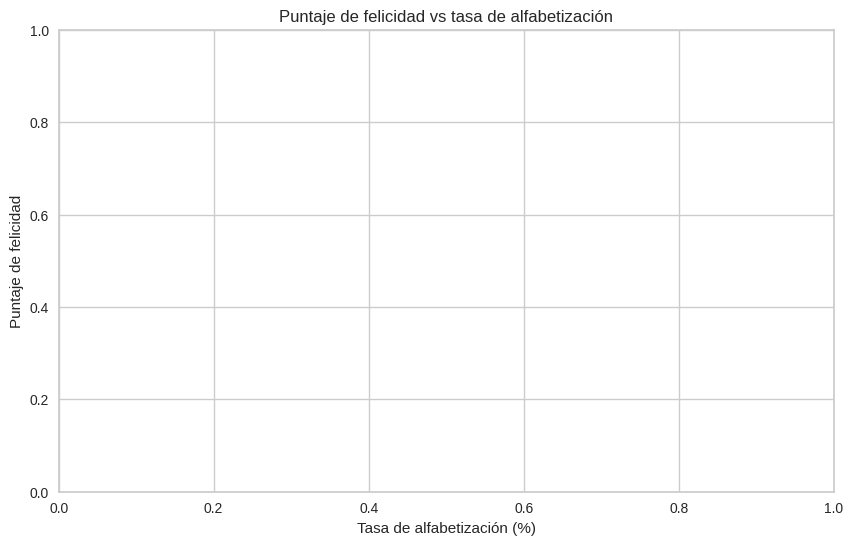

Insight 9: Los paises con tasas de alfabetización mas altas tienden a tener puntajes de felicidad mas altos.


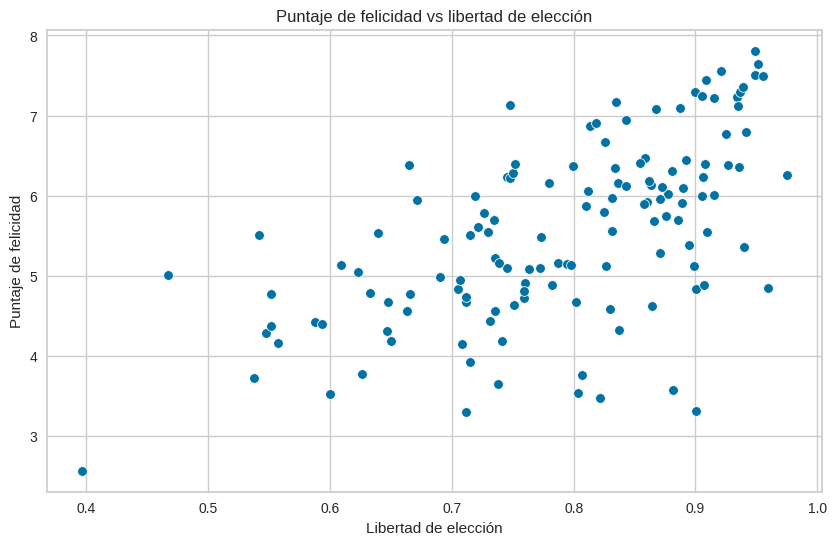

Insight 10: Existe una clara relación positiva entre la percepción de libertad de eleccón y el puntaje de felicidad de un pais


In [25]:
print("--- Análisis Exploratorio Titanic ---")

# Insight 1: Proporción de Supervivientes
plt.figure(figsize=(6, 4))
sns.countplot(x='sobrevivio', data=df_titanic_clean_no_duplicates)
plt.title('Numero de supervivientes vs. No supervivientes')
plt.xlabel('Estado de supervivencia')
plt.ylabel('Conteo')
plt.show()
print("Insight 1: La mayoria de los pasajeros del Titanic no sobrevivieron.")

# Insight 2: Supervivencia por genero
plt.figure(figsize=(6, 4))
sns.countplot(x='sobrevivio', hue='genero', data=df_titanic_clean_no_duplicates)
plt.title('Supervivencia por genero')
plt.xlabel('Estado de supervivencia')
plt.ylabel('Conteo')
plt.show()
print("Insight 2: La tasa de supervivencia de las mujeres fue significativamente mas alta que la de los hombres.")

# Insight 3: Supervivencia por Clase de Viaje
plt.figure(figsize=(8, 5))
sns.countplot(x='clase_viaje', hue='sobrevivio', data=df_titanic_clean_no_duplicates)
plt.title('Supervivencia por clase de viaje')
plt.xlabel('Clase de viaje')
plt.ylabel('Conteo')
plt.show()
print("Insight 3: Los pasajeros de primera clase tuvieron una mayor probabilidad de sobrevivir que los de segunda y tercera clase.")

# Insight 4: Distribución de la Edad
plt.figure(figsize=(8, 5))
sns.histplot(x='age', hue='sobrevivio', data=df_titanic_clean_no_duplicates, kde=True, bins=20)
plt.title('Distribución de la edad y supervivencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
print("Insight 4: Los niños (menores de 10 años) mostraron una alta tasa de supervivencia, mientras que las personas mayores tuvieron una tasa mas baja.")


print("\n--- Análisis Exploratorio Happiness ---")

# Insight 5: Distribución del Puntaje de Felicidad
plt.figure(figsize=(8, 5))
sns.histplot(df_happiness_clean_no_duplicates['puntaje_felicidad'], kde=True, bins=20)
plt.title('Distribución del puntaje de felicidad')
plt.xlabel('Puntaje de felicidad')
plt.ylabel('Frecuencia')
plt.show()
print("Insight 5: El puntaje de felicidad sigue una distribución cercana a la normal, con la mayoria de los paises en el rango medio.")

# Insight 6: Puntaje de felicidad por Región
plt.figure(figsize=(12, 6))
sns.boxplot(x='world_region', y='puntaje_felicidad', data=df_happiness_clean_no_duplicates)
plt.xticks(rotation=45, ha='right')
plt.title('Puntaje de felicidad por región Mundial')
plt.xlabel('Región Mundial')
plt.ylabel('Puntaje de Felicidad')
plt.show()
print("Insight 6: Los paises de norteamerica y australasia tienen los puntajes de felicidad mas altos, mientras que los de africa subsahariana tienen los mas bajos.")

# Insight 7: Correlación entre variables
# matriz de correlación
correlation_matrix = df_happiness_clean_no_duplicates[['puntaje_felicidad', 'soporte_social', 'libertad_de_eleccion',
                                                        'percepcion_corrupcion', 'literacy']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables de felicidad')
plt.show()
print("Insight 7: Existe una fuerte correlación positiva entre el puntaje de felicidad y el soporte social")
print("Insight 8: La percepción de corrupción muestra una correlación negativa, aunque debil, con la felicidad")

# Insight 9: Relación entre alfabetizacion (literacy) y felcidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='literacy', y='puntaje_felicidad', hue='world_region', data=df_happiness_clean_no_duplicates)
plt.title('Puntaje de felicidad vs tasa de alfabetización')
plt.xlabel('Tasa de alfabetización (%)')
plt.ylabel('Puntaje de felicidad')
plt.show()
print("Insight 9: Los paises con tasas de alfabetización mas altas tienden a tener puntajes de felicidad mas altos.")

# Insight 10: Libertad de elección vs felicidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='libertad_de_eleccion', y='puntaje_felicidad', data=df_happiness_clean_no_duplicates)
plt.title('Puntaje de felicidad vs libertad de elección')
plt.xlabel('Libertad de elección')
plt.ylabel('Puntaje de felicidad')
plt.show()
print("Insight 10: Existe una clara relación positiva entre la percepción de libertad de eleccón y el puntaje de felicidad de un pais")


------------------------
# Parte 5: Modelado Predictivo (Happiness, Titanic)

Valores NA en las variables predictoras antes de la imputación:
clase_viaje    2
genero         0
age            0
fare           1
embarked       0
dtype: int64

Valores NA en las variables predictoras después de la imputacion:
clase_viaje    0
genero         0
age            0
fare           0
embarked       0
dtype: int64

Tamaño del conjunto de entrenamiento: (757, 7)
Tamaño del conjunto de prueba: (325, 7)

--- Evaluación de Modelos de Clasificación ---

Resultados para el modelo: Regresión Logística
Matriz de Confusión:
 [[149  31]
 [ 52  93]]
Accuracy: 0.7446
Precision: 0.7500
Recall: 0.6414
AUC: 0.8080


/tmp/ipython-input-1517963632.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['clase_viaje'].fillna(moda_clase, inplace=True)
/tmp/ipython-input-1517963632.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

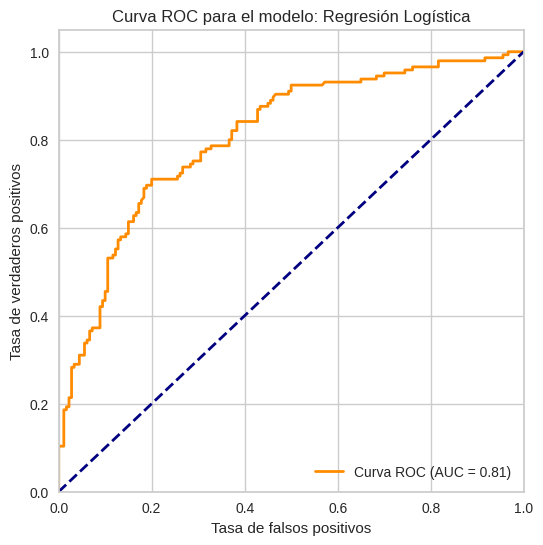


Resultados para el modelo: Naive Bayes
Matriz de Confusión:
 [[141  39]
 [ 49  96]]
Accuracy: 0.7292
Precision: 0.7111
Recall: 0.6621
AUC: 0.7532


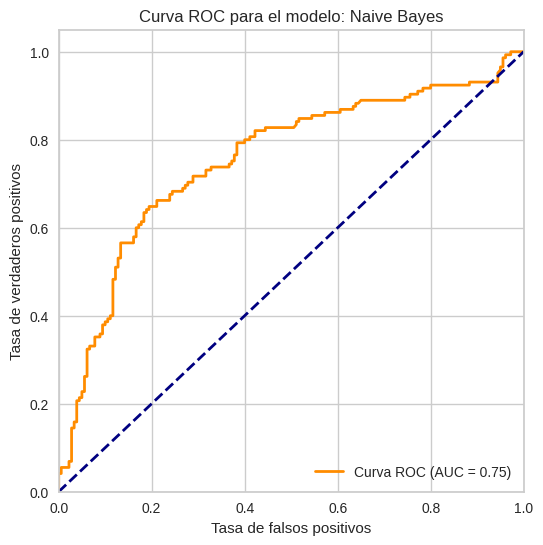


Resultados para el modelo: Arbol de decisión
Matriz de Confusión:
 [[136  44]
 [ 57  88]]
Accuracy: 0.6892
Precision: 0.6667
Recall: 0.6069
AUC: 0.6821


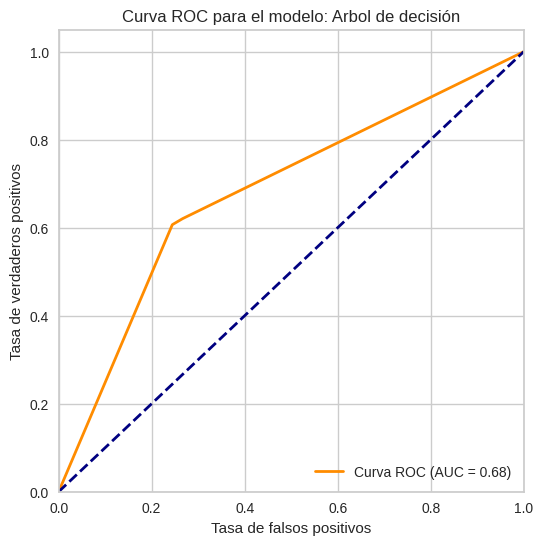


--- Importancia de variables ---


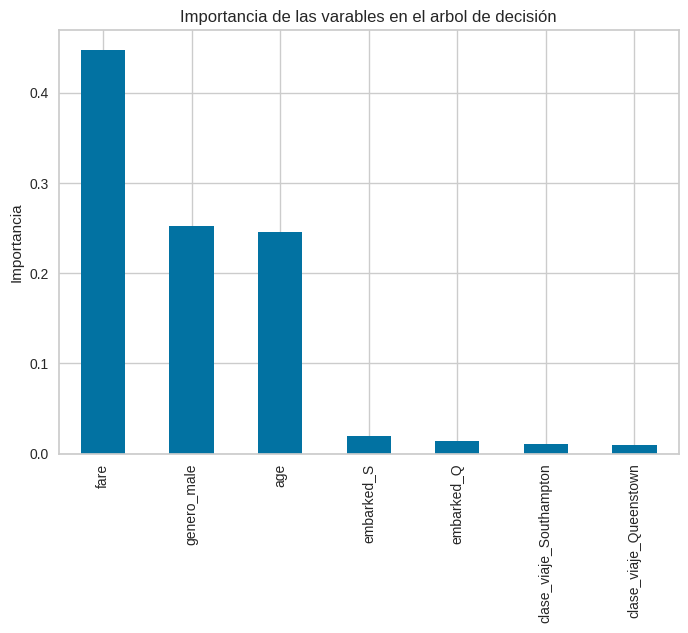

In [26]:
# 1. Seleccionar la variable objetivo y las predictoras
X = df_titanic_clean_no_duplicates[['clase_viaje', 'genero', 'age', 'fare', 'embarked']].copy()
y = df_titanic_clean_no_duplicates['sobrevivio']

print("Valores NA en las variables predictoras antes de la imputación:")
print(X.isnull().sum())

# Imputamos 'clase_viaje' con la moda
moda_clase = X['clase_viaje'].mode()[0]
X['clase_viaje'].fillna(moda_clase, inplace=True)

# Imputamos 'age'con la mediana
mediana_edad = X['age'].median()
X['age'].fillna(mediana_edad, inplace=True)

# Imputamos 'fare' con la mediana
mediana_fare = X['fare'].median()
X['fare'].fillna(mediana_fare, inplace=True)

# Imputamos 'embarked' con la moda
moda_embarked = X['embarked'].mode()[0]
X['embarked'].fillna(moda_embarked, inplace=True)

print("\nValores NA en las variables predictoras después de la imputacion:")
print(X.isnull().sum())

# 2. Codificar las variables predictoras categoricas
categorical_cols = ['clase_viaje', 'genero', 'embarked']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Dividir el dataset en 70% para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# 4. Ajustar y evaluar los modelos
model_results = {}

# Modelo 1: Regresion Logistica
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
model_results['Regresión Logística'] = {
    'y_pred': y_pred_log_reg,
    'y_prob': y_prob_log_reg,
    'model': log_reg
}

# Modelo 2: Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
model_results['Naive Bayes'] = {
    'y_pred': y_pred_gnb,
    'y_prob': y_prob_gnb,
    'model': gnb
}

# Modelo 3: arbol de decisión
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
model_results['Arbol de decisión'] = {
    'y_pred': y_pred_dtc,
    'y_prob': y_prob_dtc,
    'model': dtc
}

# 5. Evaluación de modelos
print("\n--- Evaluación de Modelos de Clasificación ---")
for model_name, results in model_results.items():
    print(f"\nResultados para el modelo: {model_name}")
    cm = confusion_matrix(y_test, results['y_pred'])
    print("Matriz de Confusión:\n", cm)
    accuracy = accuracy_score(y_test, results['y_pred'])
    precision = precision_score(y_test, results['y_pred'], average='binary', pos_label=1)
    recall = recall_score(y_test, results['y_pred'], average='binary', pos_label=1)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    fpr, tpr, _ = roc_curve(y_test, results['y_prob'], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title(f'Curva ROC para el modelo: {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# 6. Importancia de las variables
print("\n--- Importancia de variables ---")
feature_importances = pd.Series(model_results['Arbol de decisión']['model'].feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Importancia de las varables en el arbol de decisión')
plt.ylabel('Importancia')
plt.show()


-------------------------
# Parte 6: TURF Analysis (Total Unduplicated Reach and Frequency) (Happiness)

Variables dicotomcas creadas para el TURF Analysis:
['puntaje_felicidad_alto', 'soporte_social_alto', 'libertad_de_eleccion_alto', 'percepcion_corrupcion_alto', 'healthy_life_expectancy_alto']

--- Resultado del TURF Analysis ---
La mejor combinación de variables (con el mayor alcance) es: ['libertad_de_eleccion_alto', 'percepcion_corrupcion_alto', 'healthy_life_expectancy_alto']
El alcance de esta combinación es: 130 paises.


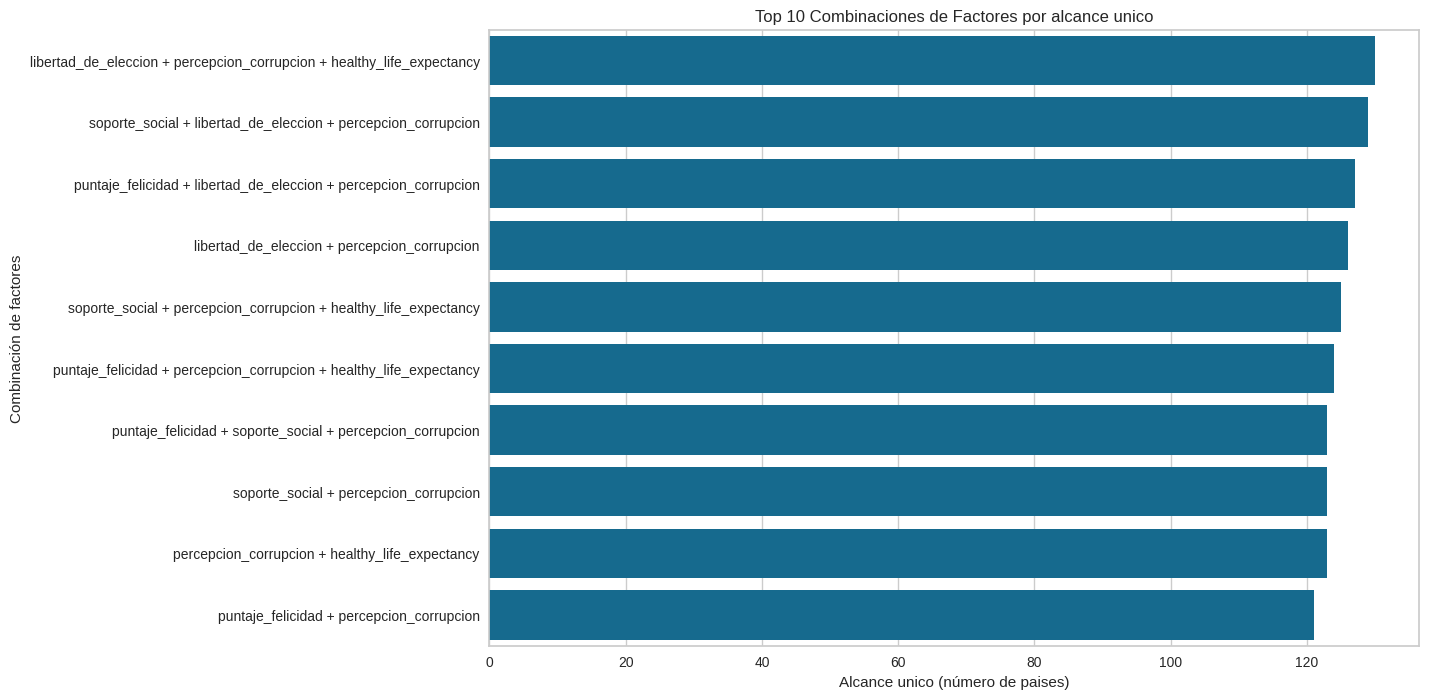


--- Justificación de la Recomendación ---
La mejor combinacion de factores de 'alto' nivel es la que logra llegar a la mayor cantidad de paises, es decir, tiene el mayor 'reach'.
Segun el grafico, esta combinación es la que representa el mayor porcentaje de la población total. Esto es crucial para la toma de decisiones, ya sea en politicas publicas o en estrategias de negocio.


In [27]:
# Elegimos 5 variables numéricas clave del dataset de felicidad para dicotomizar..
variables_turf = ['puntaje_felicidad', 'soporte_social', 'libertad_de_eleccion',
                  'percepcion_corrupcion', 'healthy_life_expectancy']

# Dicotomizar las variables: Crear nuevas variables binarias (0, 1)
df_turf = df_happiness_clean_no_duplicates[variables_turf].copy()

# Se dicotomiza cada variable, asignando 1 si está por encima de la media y 0 si no.
for var in variables_turf:
    media = df_turf[var].mean()
    df_turf[f'{var}_alto'] = (df_turf[var] > media).astype(int)

# Las nuevas variables dicotomicas son:
dichotomous_vars = [f'{var}_alto' for var in variables_turf]
print("Variables dicotomcas creadas para el TURF Analysis:")
print(dichotomous_vars)

# Ejecutar el analisis TURF para maximizar la cobertura
max_combinations = 3
results = []

for k in range(1, max_combinations + 1):
    for combo in combinations(dichotomous_vars, k):
        reach = (df_turf[list(combo)].sum(axis=1) > 0).sum()
        results.append({
            'combinacion': list(combo),
            'reach': reach
        })

df_results = pd.DataFrame(results)

best_combination = df_results.sort_values(by='reach', ascending=False).iloc[0]

print("\n--- Resultado del TURF Analysis ---")
print(f"La mejor combinación de variables (con el mayor alcance) es: {best_combination['combinacion']}")
print(f"El alcance de esta combinación es: {best_combination['reach']} paises.")

# Justificar la recomendación con visualizaciones y texto
df_results['combinacion_str'] = df_results['combinacion'].apply(lambda x: ' + '.join([v.replace('_alto', '') for v in x]))
top_combinations = df_results.sort_values(by='reach', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='reach', y='combinacion_str', data=top_combinations)
plt.title('Top 10 Combinaciones de Factores por alcance unico')
plt.xlabel('Alcance unico (número de paises)')
plt.ylabel('Combinación de factores')
plt.show()

print("\n--- Justificación de la Recomendación ---")
print("La mejor combinacion de factores de 'alto' nivel es la que logra llegar a la mayor cantidad de paises, es decir, tiene el mayor 'reach'.")
print("Segun el grafico, esta combinación es la que representa el mayor porcentaje de la población total. Esto es crucial para la toma de decisiones, ya sea en politicas publicas o en estrategias de negocio.")


-------------
# Parte 7: Clustering (Happiness)

-----------
9. K- means

--- Grafico del Codo para K-Means ---


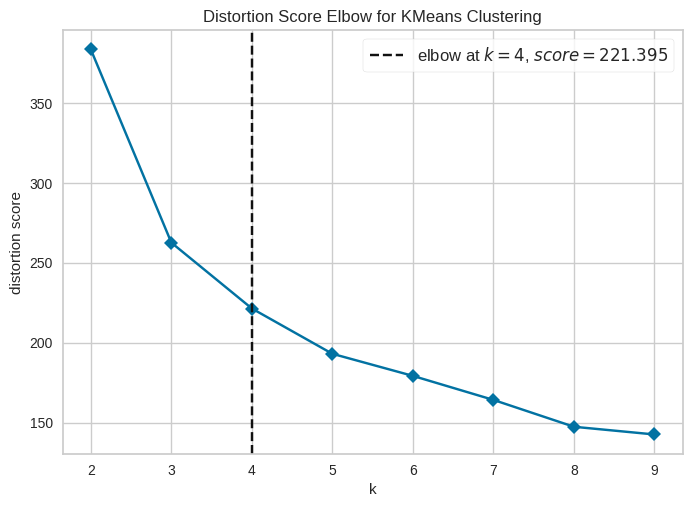

Justificación: El gráfico del codo muestra el punto de inflexion donde la inercia disminuye de forma menos pronunciada, indicando el numero óptimo de clusters (k).

--- Descripción de los grupos K-Means (k=3) ---
                puntaje_felicidad  soporte_social  libertad_de_eleccion  \
cluster_kmeans                                                            
0                        7.150233        0.930699              0.912454   
1                        4.383531        0.688230              0.709689   
2                        5.838167        0.870720              0.810789   

                percepcion_corrupcion  healthy_life_expectancy  
cluster_kmeans                                                  
0                            0.402955                72.348688  
1                            0.768866                57.795268  
2                            0.800572                67.415780  


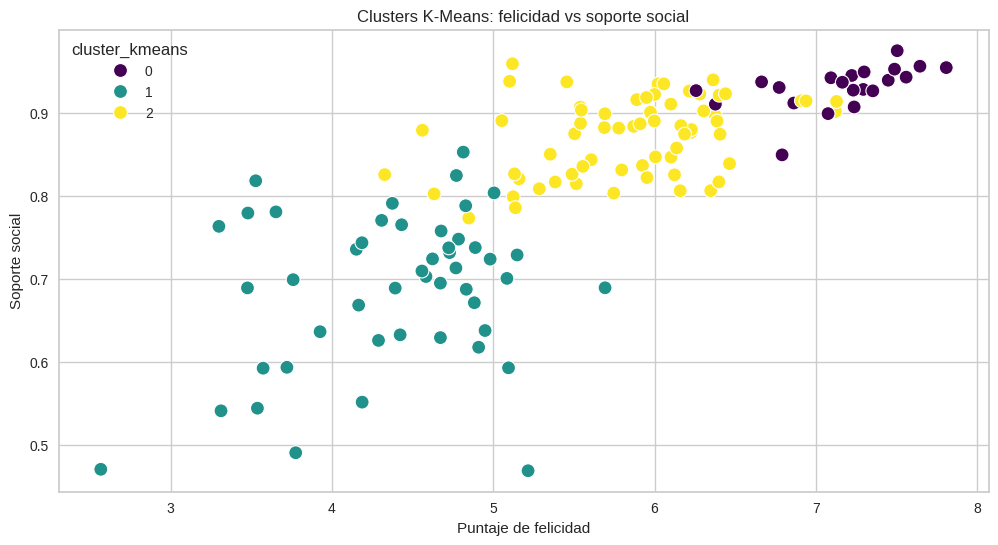

In [28]:
# Seleccionar 5 variables para agrupar y escalarlas
# Elegimos variables que describen el bienestar y la situación socioeconomica de los paises.
variables_clustering = ['puntaje_felicidad', 'soporte_social', 'libertad_de_eleccion',
                        'percepcion_corrupcion', 'healthy_life_expectancy']

X_clustering = df_happiness_clean_no_duplicates[variables_clustering].copy()

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Usar el grafico del codo para justifiar la elección de k
print("--- Grafico del Codo para K-Means ---")
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X_scaled)
visualizer.show()
print("Justificación: El gráfico del codo muestra el punto de inflexion donde la inercia disminuye de forma menos pronunciada, indicando el numero óptimo de clusters (k).")

# Ejecutar el algoritmo K-Means para al menos dos valores de k
# Basándonos en el gráfico del codo, elegimos un valor óptimo y uno suboptimo.
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_happiness_clean_no_duplicates['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Describir los grupos resultantes
print("\n--- Descripción de los grupos K-Means (k={}) ---".format(k_optimal))
cluster_summary = df_happiness_clean_no_duplicates.groupby('cluster_kmeans')[variables_clustering].mean()
print(cluster_summary)

# Visualización de los grupos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='puntaje_felicidad', y='soporte_social', hue='cluster_kmeans', data=df_happiness_clean_no_duplicates, palette='viridis', s=100)
plt.title('Clusters K-Means: felicidad vs soporte social')
plt.xlabel('Puntaje de felicidad')
plt.ylabel('Soporte social')
plt.show()

10. Clustering Jerárquico


--- Clustering Jerárquico ---


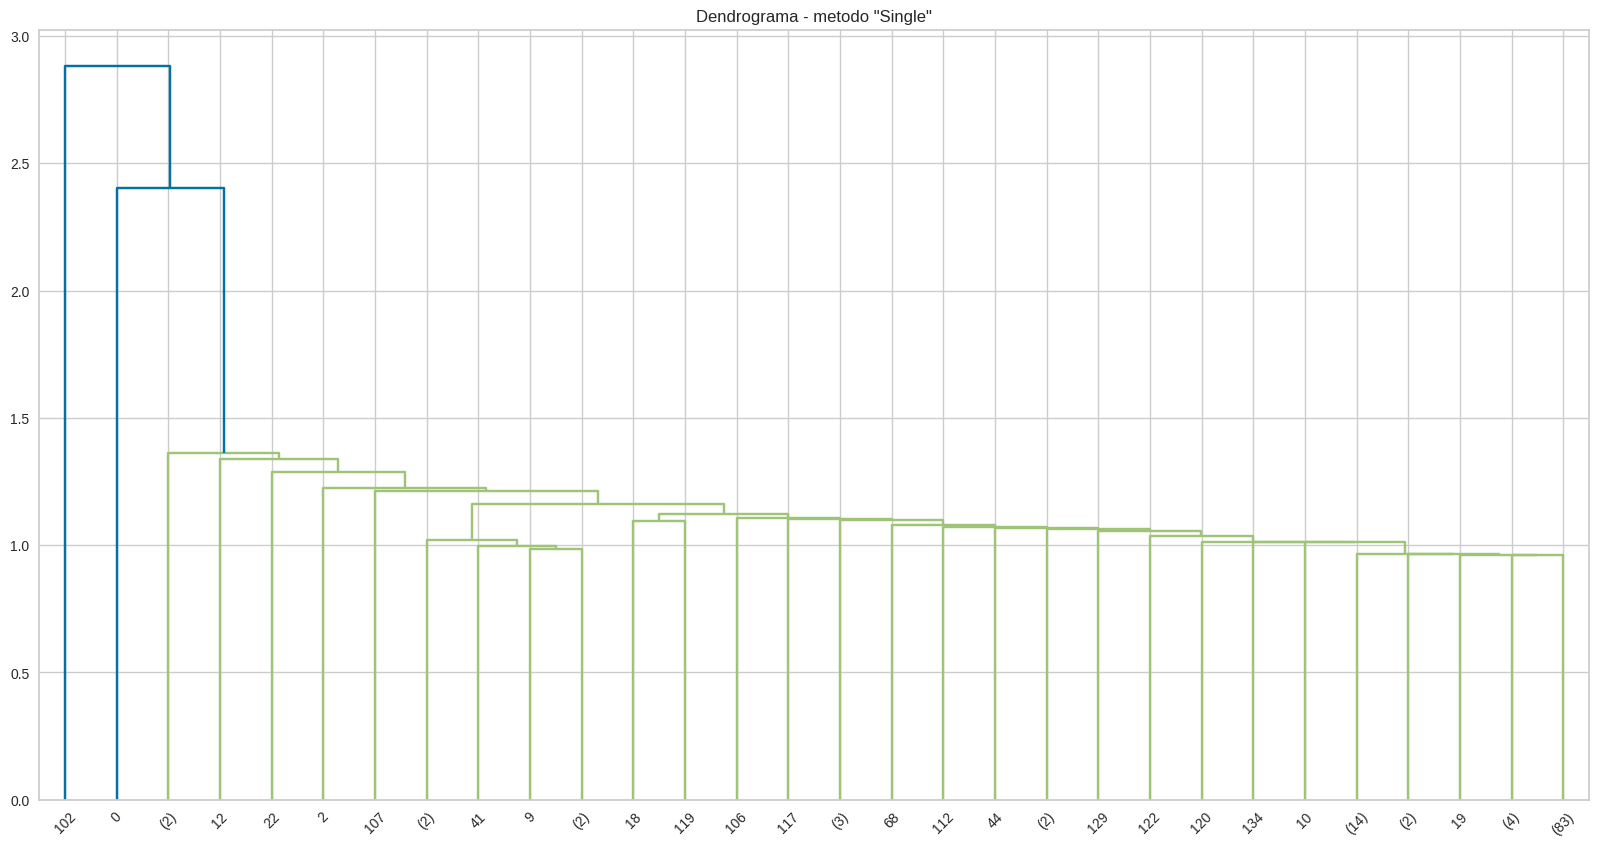

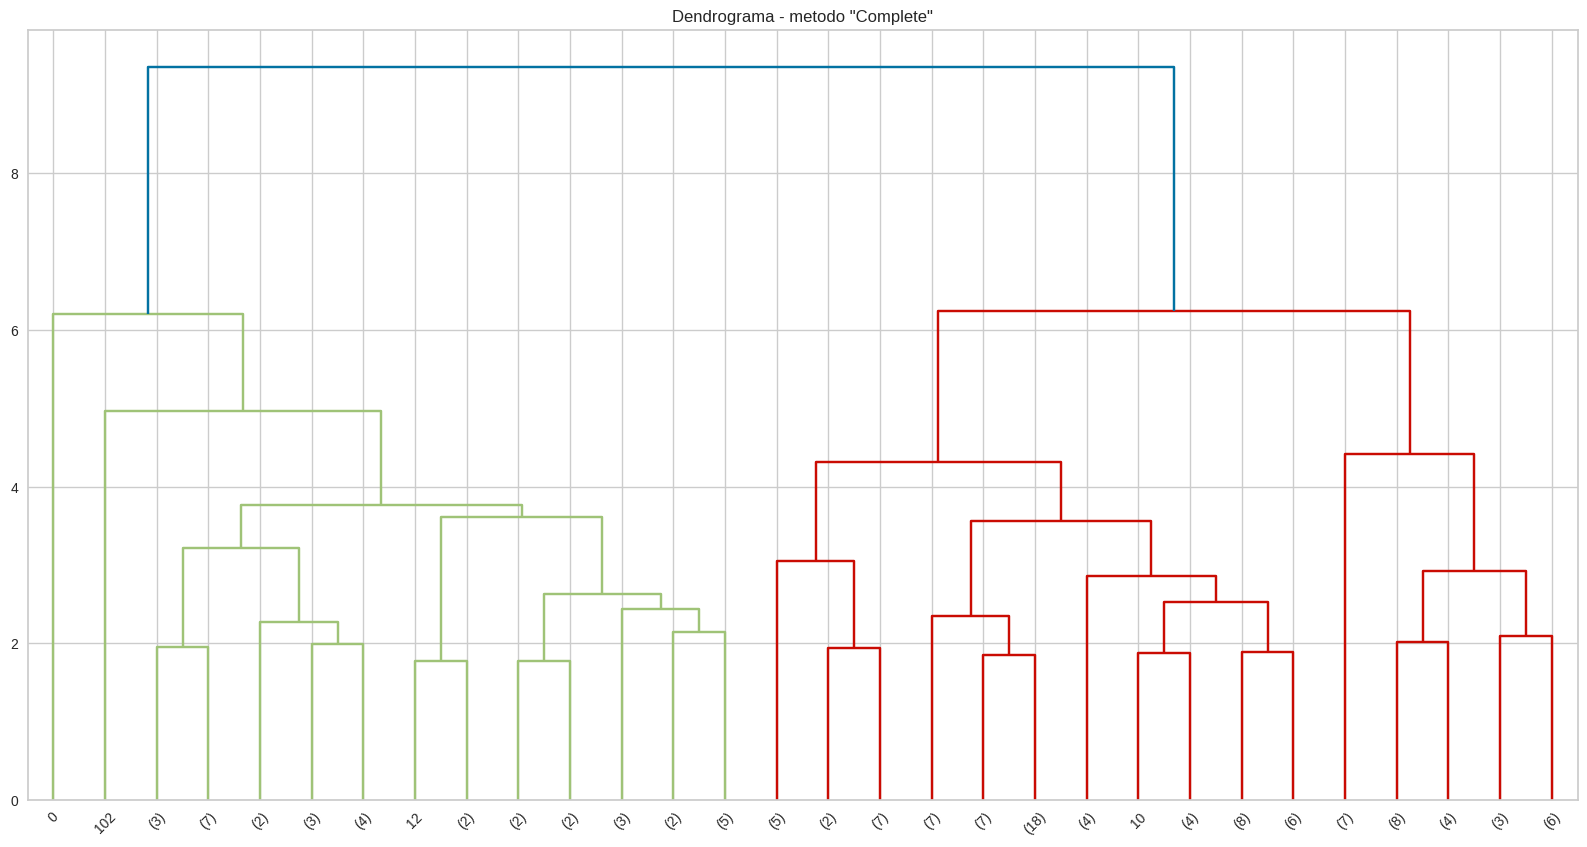

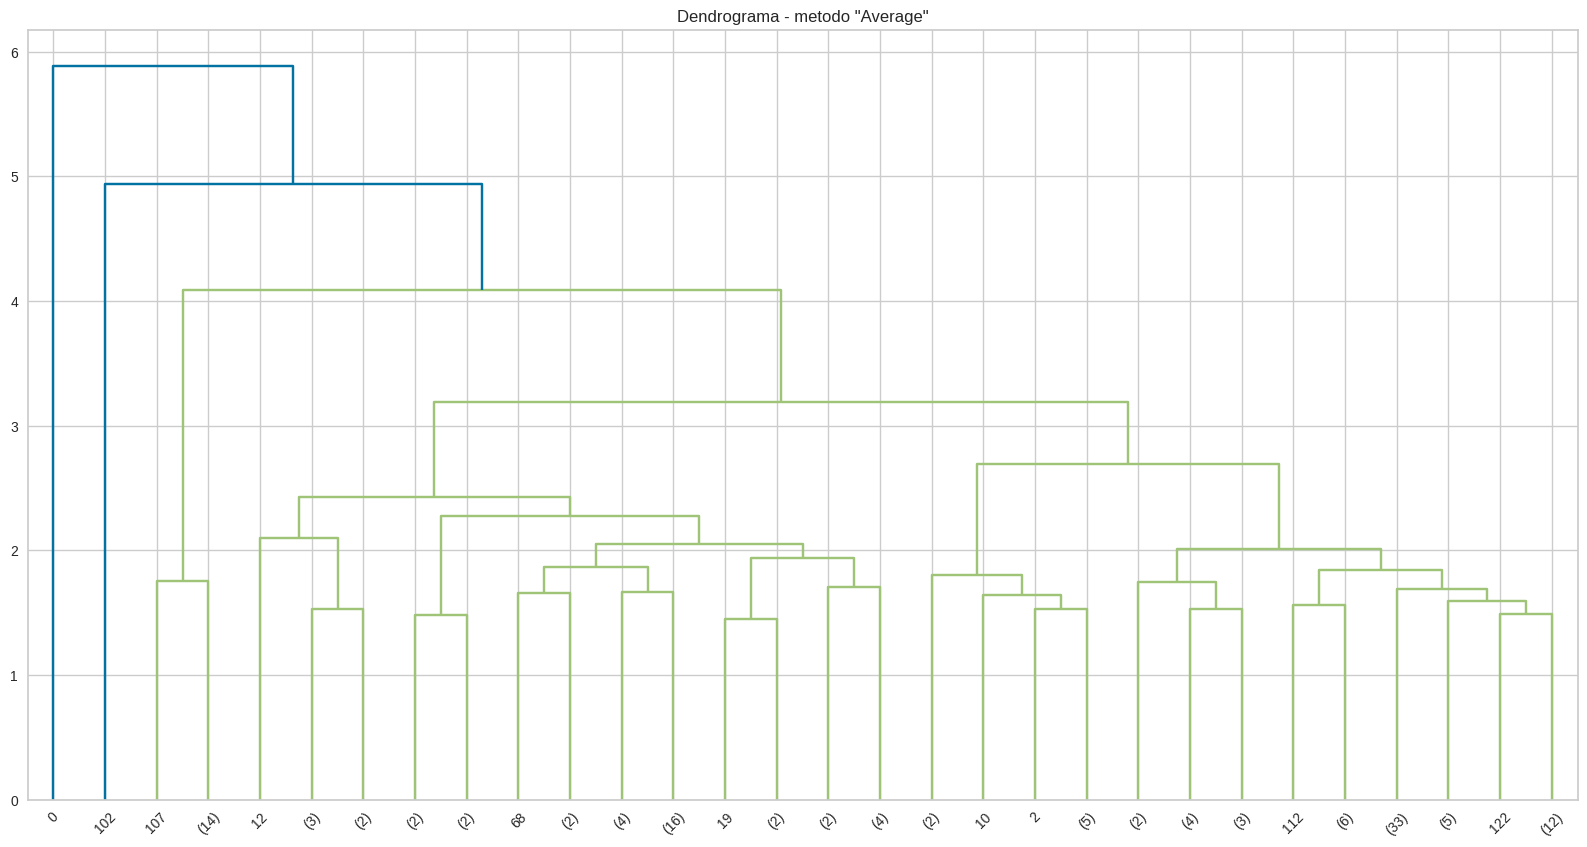

Justificación: Los dendrogramas muestran como los paises se van uniendo en clusters. El dendrograma 'average' suele ser un buen punto de partida, ya que reduce el efecto del ruido y los outliers.

--- Descripcin de los grupos jerarquicos (k=3) ---
                    puntaje_felicidad  soporte_social  libertad_de_eleccion  \
cluster_jerarquico                                                            
1                            5.563941        0.819820              0.792793   
2                            3.312300        0.540835              0.900589   
3                            2.566900        0.470367              0.396573   

                    percepcion_corrupcion  healthy_life_expectancy  
cluster_jerarquico                                                  
1                                0.729986                64.881564  
2                                0.183541                61.098846  
3                                0.933687                52.590000  


In [29]:
print("\n--- Clustering Jerárquico ---")

# Calcular la matriz de distancias
X_dist = pdist(X_scaled, metric='euclidean')

# Aplicar los métodos de linkage: 'single', 'complete' y 'average'
linkage_single = linkage(X_dist, method='single')
linkage_complete = linkage(X_dist, method='complete')
linkage_average = linkage(X_dist, method='average')

# Mostrar los dendrogramas
plt.figure(figsize=(20, 10))
plt.title('Dendrograma - metodo "Single"')
dendrogram(linkage_single, truncate_mode='lastp', p=30)
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Dendrograma - metodo "Complete"')
dendrogram(linkage_complete, truncate_mode='lastp', p=30)
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Dendrograma - metodo "Average"')
dendrogram(linkage_average, truncate_mode='lastp', p=30)
plt.show()
print("Justificación: Los dendrogramas muestran como los paises se van uniendo en clusters. El dendrograma 'average' suele ser un buen punto de partida, ya que reduce el efecto del ruido y los outliers.")


# Elegir y justificar el número de grupos
num_grupos_jerarquico = 3
from scipy.cluster.hierarchy import fcluster
df_happiness_clean_no_duplicates['cluster_jerarquico'] = fcluster(linkage_average, t=num_grupos_jerarquico, criterion='maxclust')

# Describir cada grupo
print("\n--- Descripcin de los grupos jerarquicos (k={}) ---".format(num_grupos_jerarquico))
cluster_summary_jerarquico = df_happiness_clean_no_duplicates.groupby('cluster_jerarquico')[variables_clustering].mean()
print(cluster_summary_jerarquico)
